In [12]:
# Cell 1: Import necessary libraries and load dataset
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Load dataset

df = pd.read_csv('raw_analyst_ratings.csv')
df.head()



,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [13]:
# Cell 2: Descriptive statistics for headline lengths and count articles per publisher

# Calculate headline length in words
df['headline_length_words'] = df['headline'].apply(lambda x: len(str(x).split()))

# Display basic statistics for headline length
print("Headline Length Statistics:")
print(df['headline_length_words'].describe())

# Count the number of articles per publisher
print("\nNumber of articles per publisher:")
print(df['publisher'].value_counts())


Headline Length Statistics:
count    1.407328e+06
mean     1.141671e+01
std      6.352997e+00
min      1.000000e+00
25%      7.000000e+00
50%      1.000000e+01
75%      1.300000e+01
max      7.700000e+01
Name: headline_length_words, dtype: float64

Number of articles per publisher:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


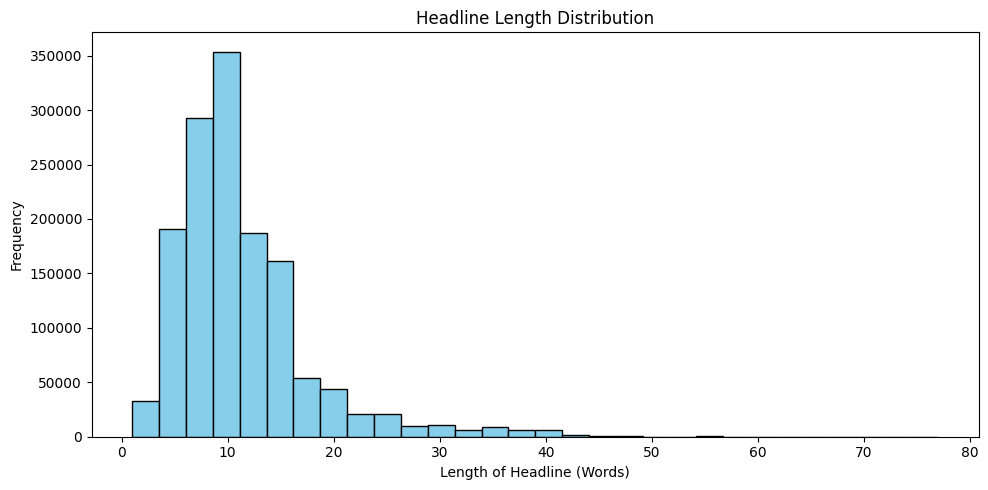

In [24]:
# Histogram of headline lengths
import matplotlib.pyplot as plt

# Make sure the column name is correct (likely 'headline_length_words')
plt.figure(figsize=(10, 5))
plt.hist(df['headline_length_words'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Headline Length Distribution')
plt.xlabel('Length of Headline (Words)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

corpus = df['headline'].fillna('')

# TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=50, ngram_range=(1, 2))
X = tfidf.fit_transform(corpus)
print("Top TF-IDF keywords/phrases:")
print(tfidf.get_feature_names_out())

# LDA
count_vect = TfidfVectorizer(stop_words='english', max_features=1000)
X_counts = count_vect.fit_transform(corpus)

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X_counts)

def display_topics(model, feature_names, no_top_words):
    for idx, topic in enumerate(model.components_):
        print(f"\nTopic {idx + 1}:", " ".join(
            [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        ))

print("\nLDA Topics:")
display_topics(lda, count_vect.get_feature_names_out(), 10)


In [ ]:
# Drop rows where conversion failed
df = df.dropna(subset=['date'])

# Extract hour
df['publication_hour'] = df['date'].dt.hour

# Count articles per hour
hourly_counts = df.groupby('publication_hour').size()

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
hourly_counts.plot(kind='bar', title='Number of Articles Published by Hour of Day', color='skyblue')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Articles')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



In [ ]:
# Cell 6: Publisher analysis - Article counts and domain extraction

# Count number of articles per publisher
publisher_counts = df['publisher'].value_counts()
print("Number of articles per publisher:")
print(publisher_counts)

# Extract domains if publisher looks like an email address
if df['publisher'].str.contains('@').any():
    df['publisher_domain'] = df['publisher'].str.split('@').str[-1]
    domain_counts = df['publisher_domain'].value_counts()
    print("\nNumber of articles per publisher domain:")
    print(domain_counts)
else:
    print("\nNo email addresses detected in publisher names.")
